In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [75]:
df = pd.read_csv("USArrest.csv", index_col=0)

In [76]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.8,45,58,7.3
Alaska,2.1,46,48,7.8
Arizona,2.1,48,80,8.3
Arkansas,2.2,53,50,9.3
California,2.2,56,91,9.5


## Explatory Data Analysis

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


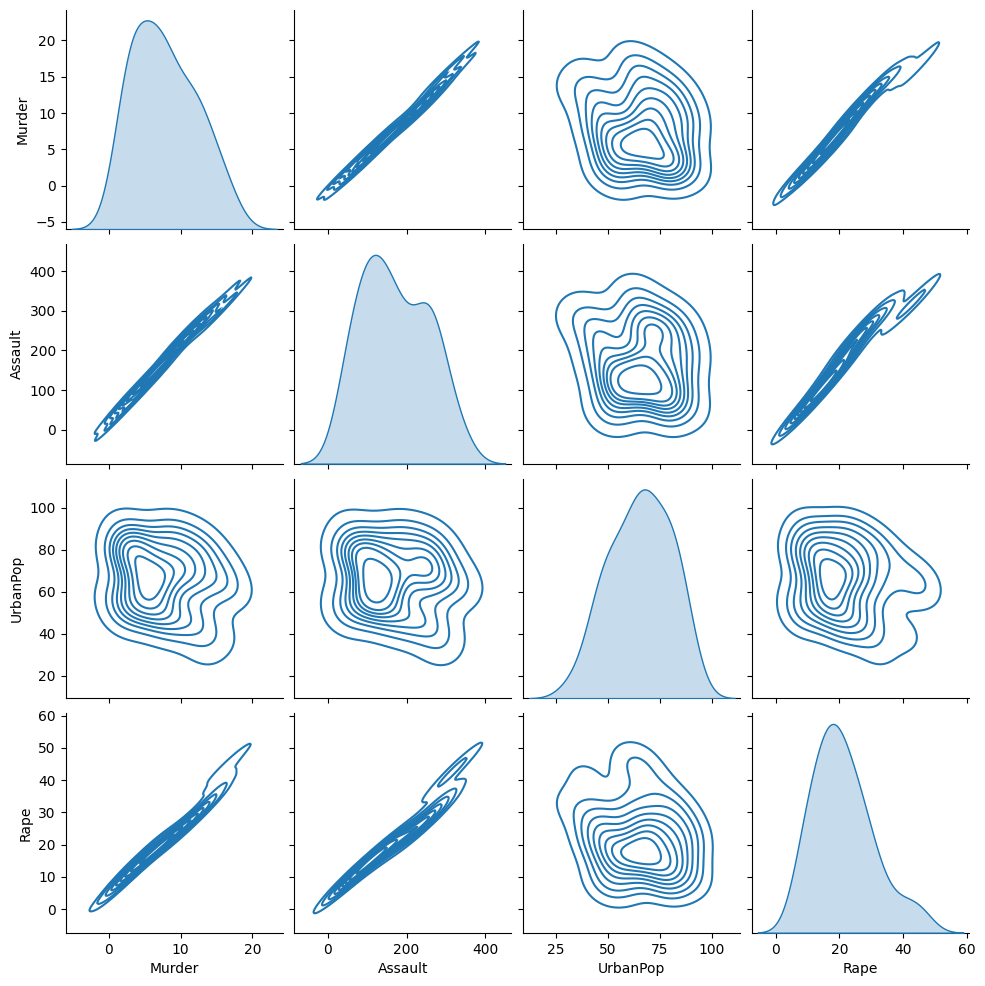

In [81]:
sns.pairplot(df, kind="kde");

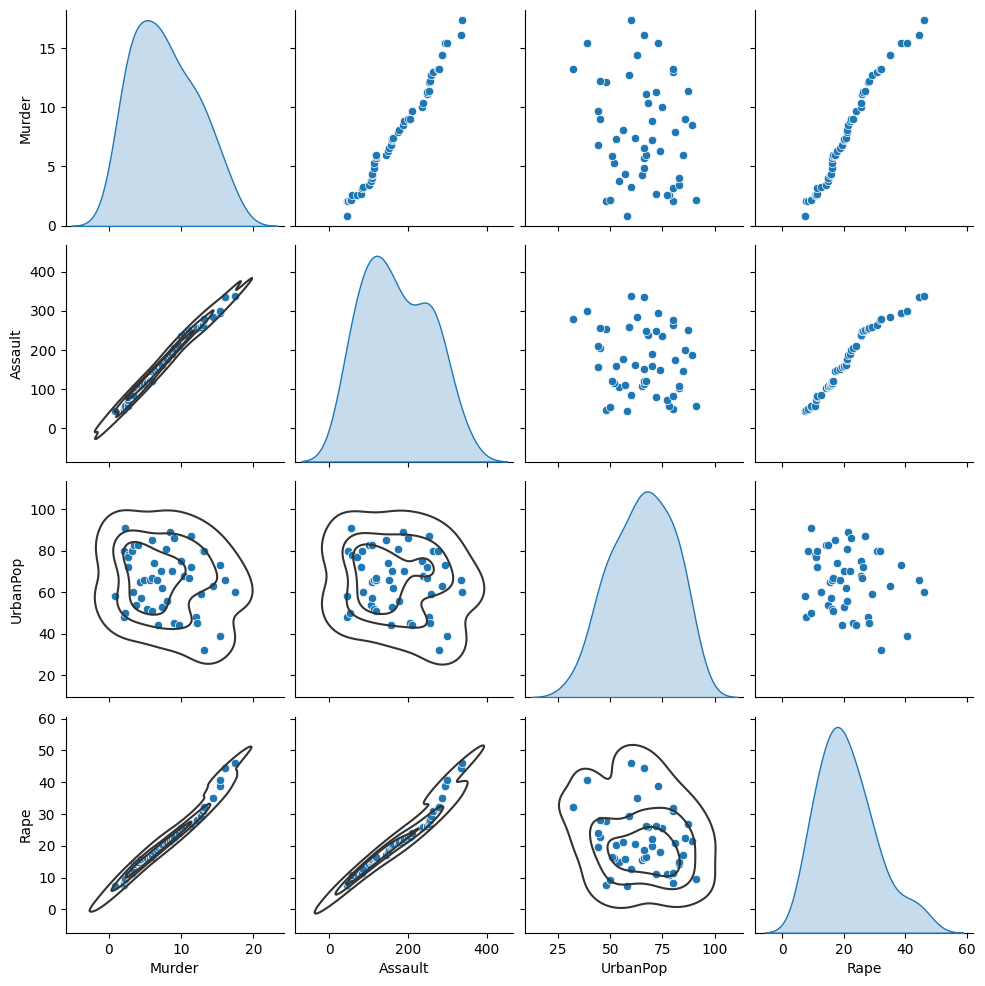

In [82]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

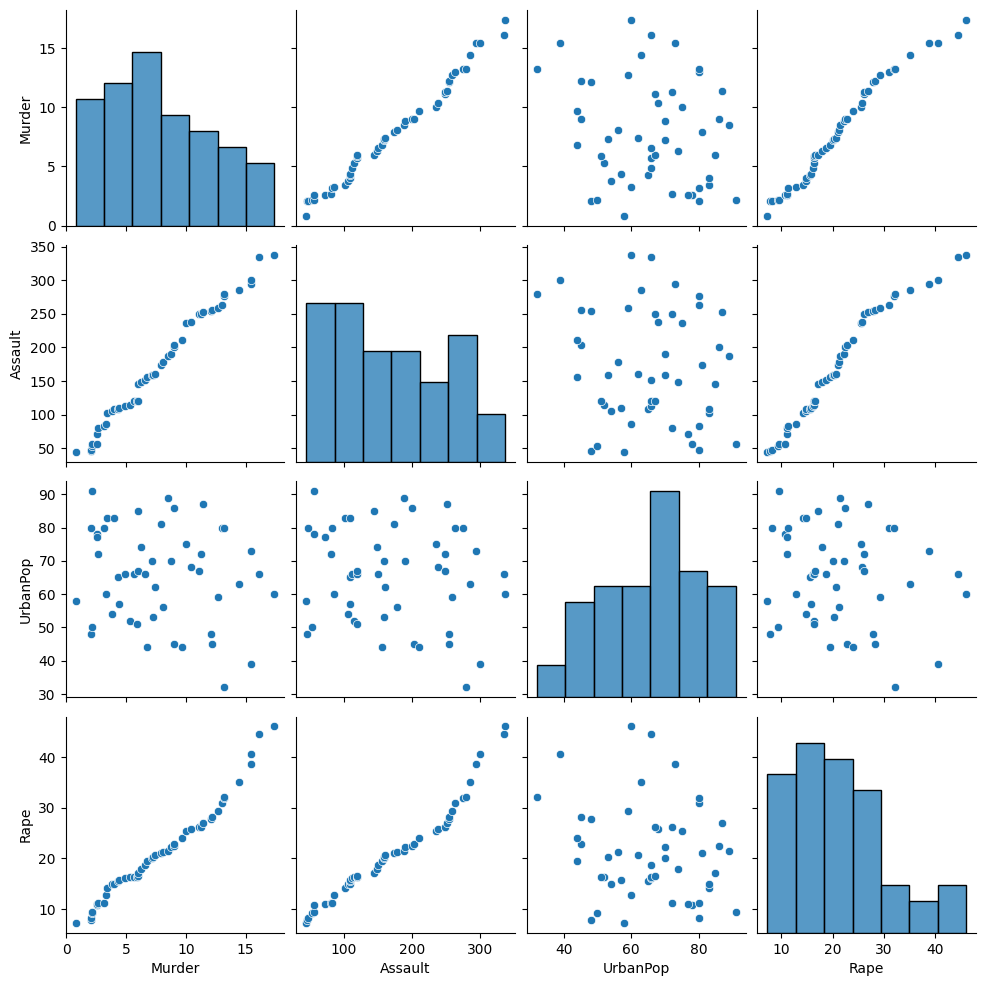

In [79]:
sns.pairplot(df);

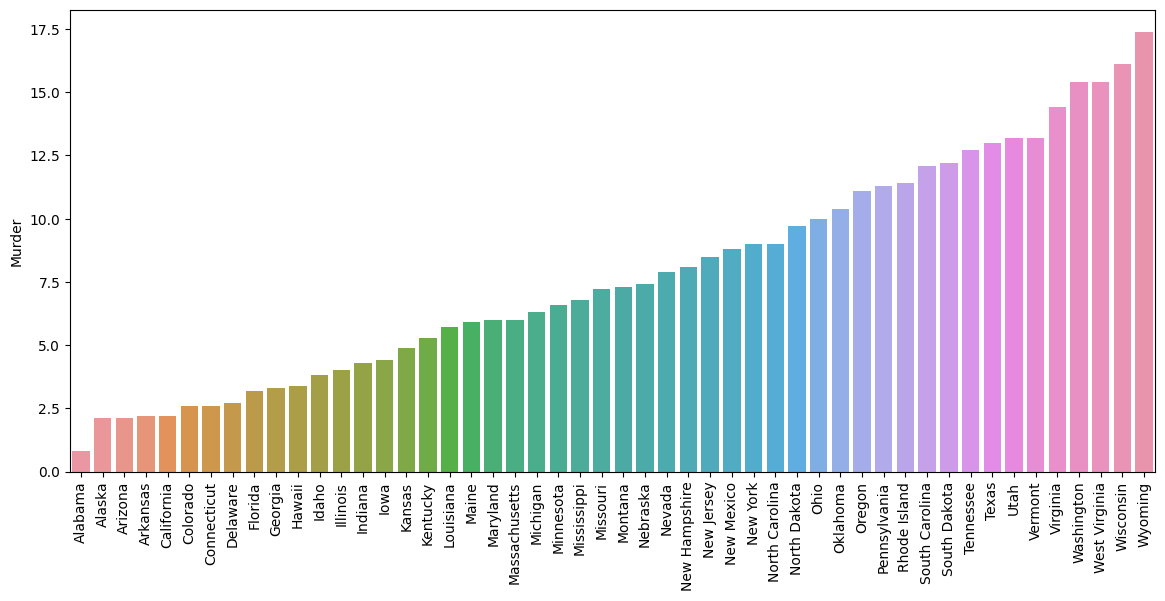

In [14]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Murder.sort_values(), x = df.Murder.sort_values().index)
plt.xticks(rotation = 90);

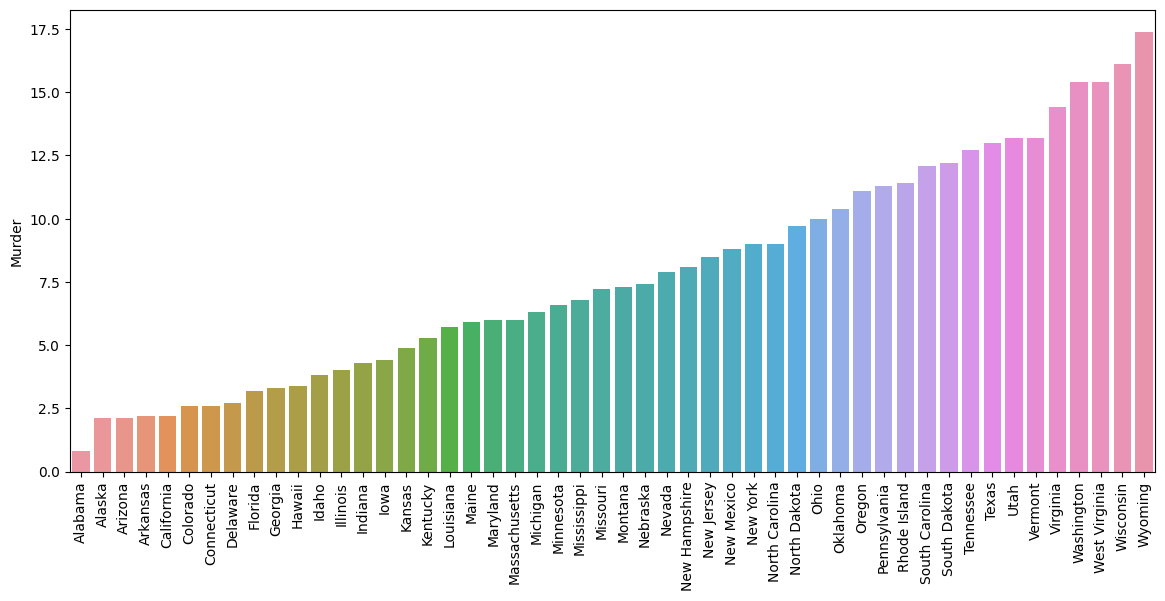

In [15]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Murder.sort_values(), x = df.Murder.sort_values().index)
plt.xticks(rotation = 90);

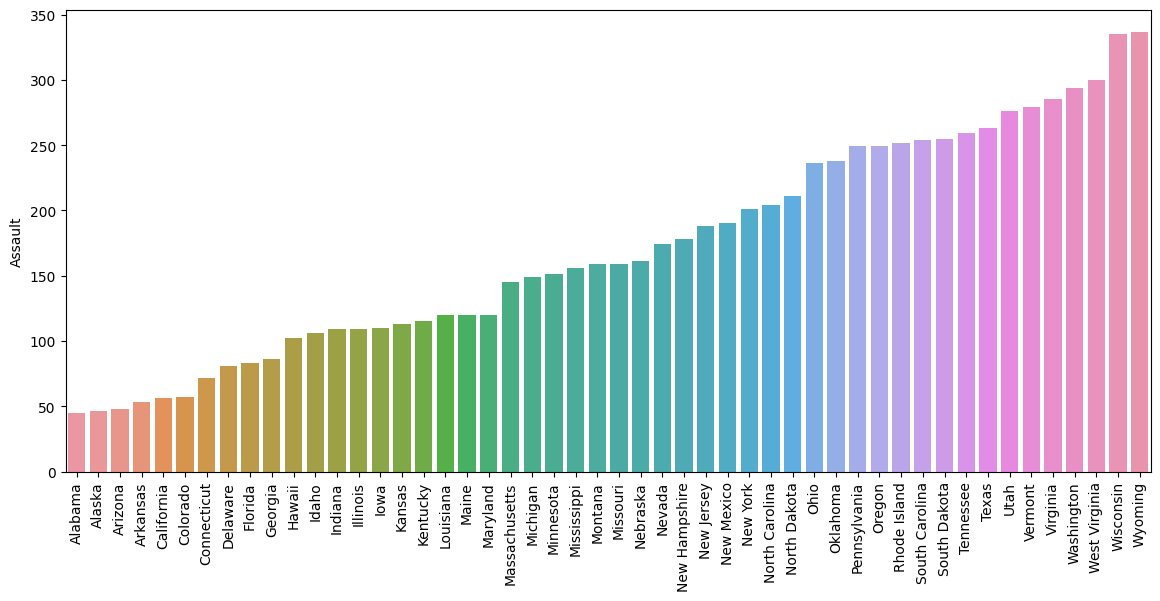

In [16]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Assault.sort_values(), x = df.Assault.sort_values().index)
plt.xticks(rotation = 90);

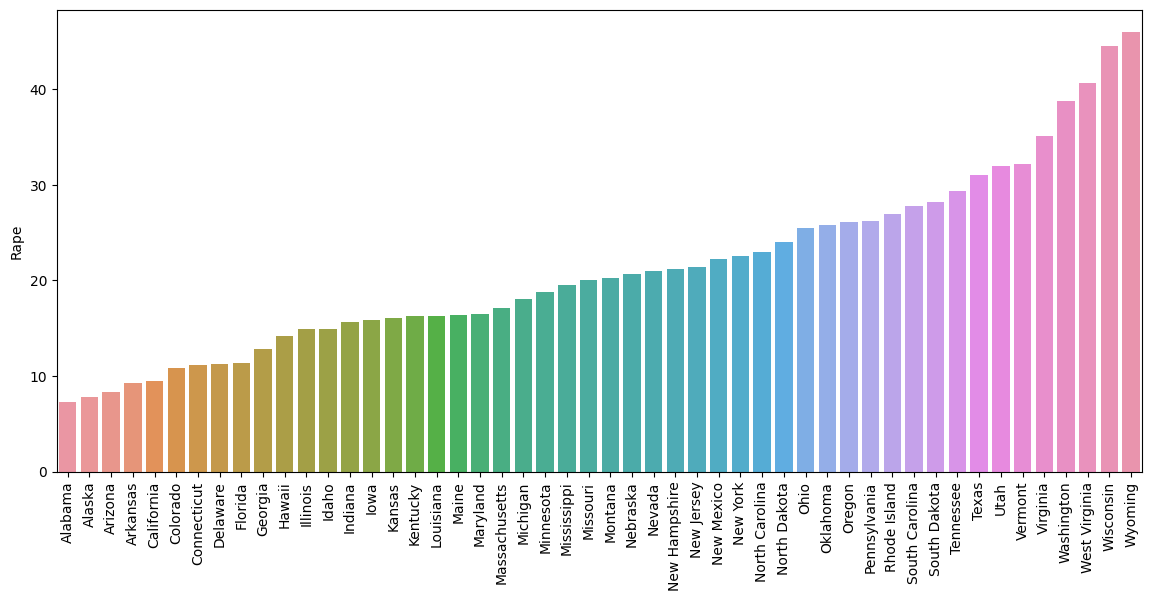

In [17]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Rape.sort_values(), x = df.Rape.sort_values().index)
plt.xticks(rotation = 90);

##  Hopkins Test

In [19]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]
# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur!
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [20]:
hopkins(df, df.shape[0])

0.3532792242286388

## Scale

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
df1 = df.copy()
df2 = df.copy()

In [25]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])

0.19711231275687147

In [26]:

hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.21391919606092524

In [27]:
scaler = MinMaxScaler()

In [28]:
df_scaled = scaler.fit_transform(df)

In [29]:
X = pd.DataFrame(df_scaled, columns = df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.000000,0.000000,0.440678,0.000000
1,0.078313,0.003425,0.271186,0.012920
2,0.078313,0.010274,0.813559,0.025840
3,0.084337,0.027397,0.305085,0.051680
4,0.084337,0.037671,1.000000,0.056848


## Dendrogram

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

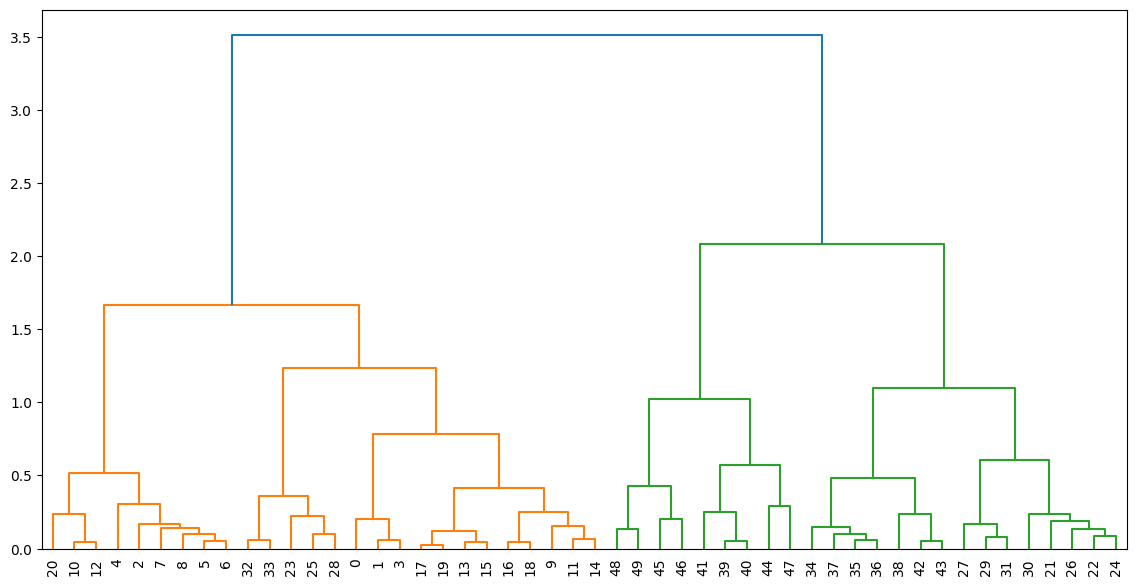

In [32]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

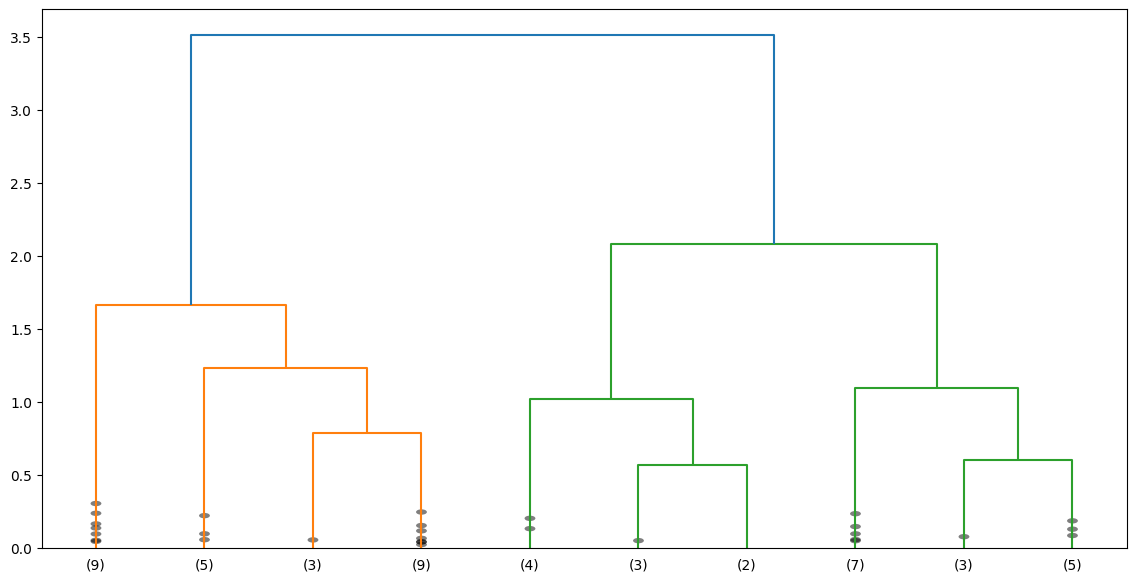

In [33]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

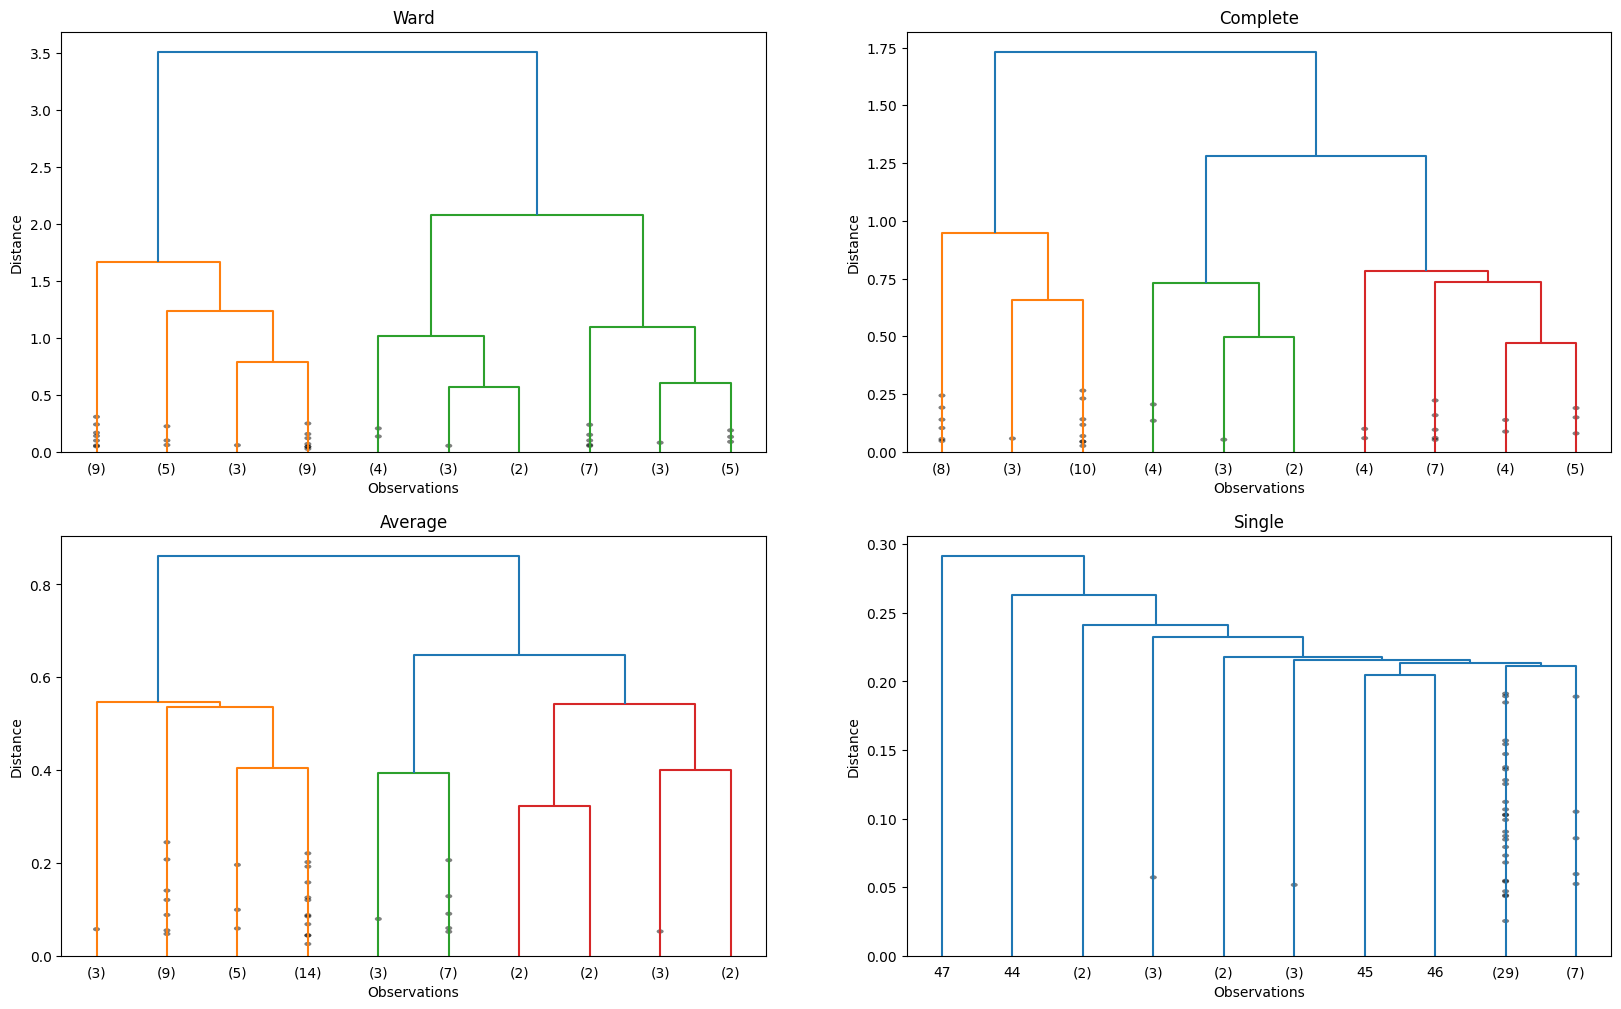

In [34]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

## Hierarchical clustering (Agglomerative)

In [35]:
from sklearn.cluster import AgglomerativeClustering

## S(Silhouette Score)

In [36]:
from sklearn.metrics import silhouette_score

In [47]:
K = range(2, 11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.610603270211679
Silhouette Score for 3 clusters: 0.6586358026796982
Silhouette Score for 4 clusters: 0.5380175289336718
Silhouette Score for 5 clusters: 0.5562318316120389
Silhouette Score for 6 clusters: 0.4853130995767895
Silhouette Score for 7 clusters: 0.45002060999992965
Silhouette Score for 8 clusters: 0.47458613884472844
Silhouette Score for 9 clusters: 0.47905155294484814
Silhouette Score for 10 clusters: 0.4797866633561516


In [48]:
X.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.000000,0.000000,0.440678,0.000000,0
1,0.078313,0.003425,0.271186,0.012920,0
2,0.078313,0.010274,0.813559,0.025840,0
3,0.084337,0.027397,0.305085,0.051680,0
4,0.084337,0.037671,1.000000,0.056848,0


In [49]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

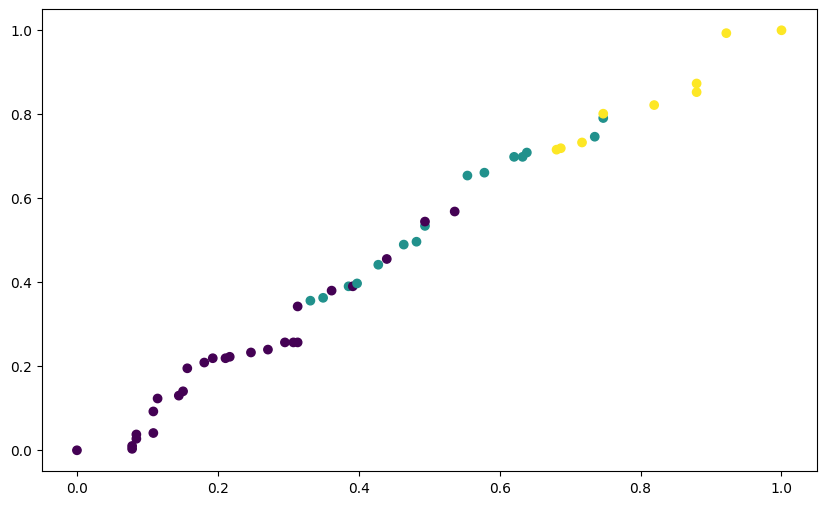

In [50]:
plt.scatter(X.Murder, X.Assault, c = clusters, cmap = "viridis");

In [51]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.226135,0.522490,0.814592
Assault,0.215227,0.561872,0.834475
UrbanPop,0.543025,0.731073,0.370998
Rape,0.190320,0.428079,0.736721


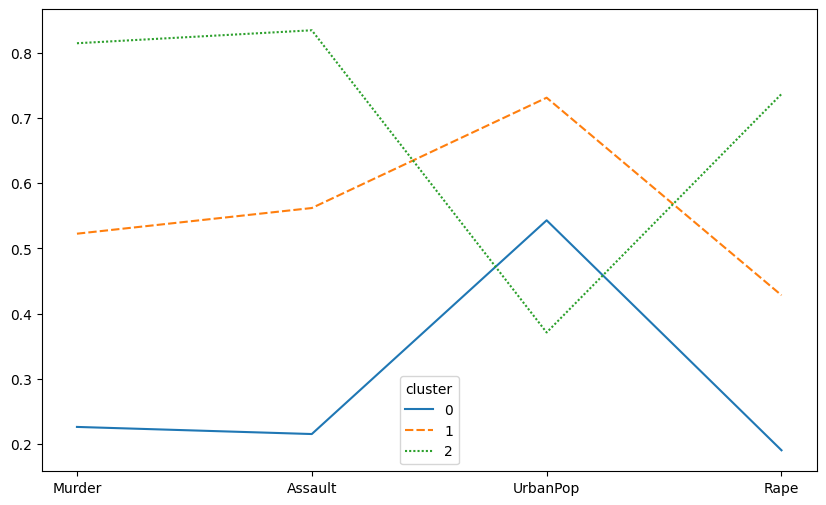

In [52]:
sns.lineplot(data = clus_pred);

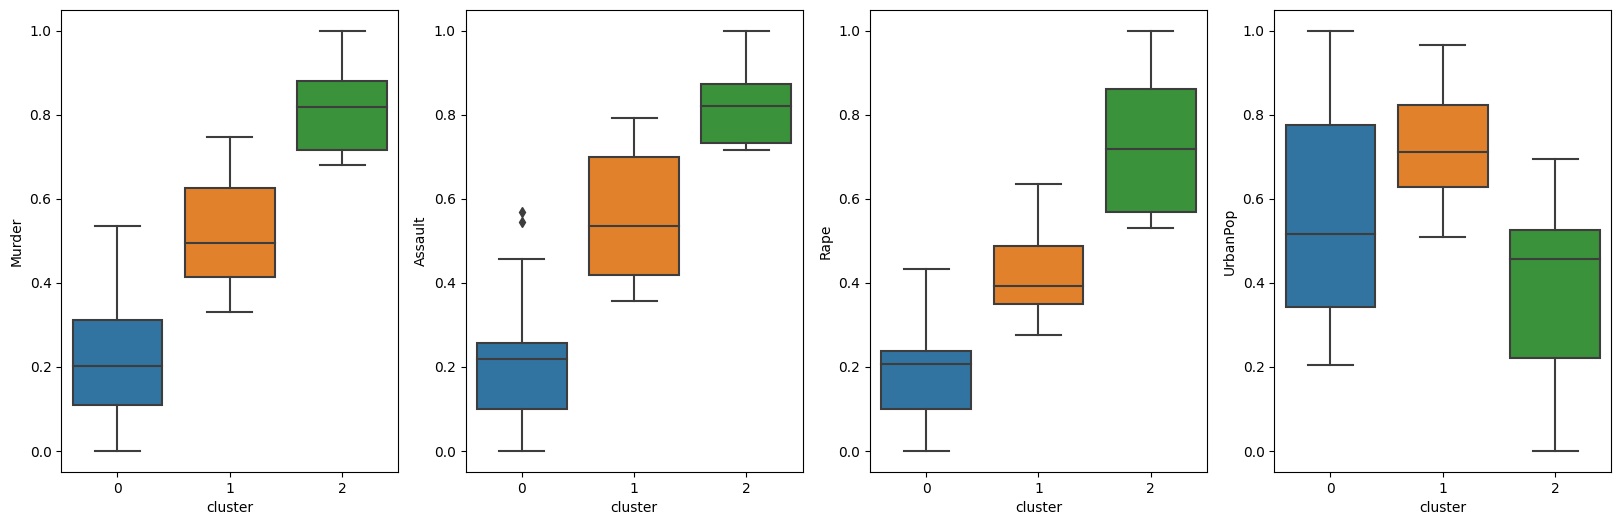

In [53]:
plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "Murder", x = "cluster", data = X)
plt.subplot(142)
sns.boxplot(y = "Assault", x = "cluster", data = X)
plt.subplot(143)
sns.boxplot(y = "Rape", x = "cluster", data = X)
plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "cluster", data = X);

In [56]:
X.cluster.value_counts()

0    26
1    15
2     9
Name: cluster, dtype: int64

In [57]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.000000,0.000000,0.000000
1,0.078313,0.003425,0.012920
2,0.078313,0.010274,0.025840
3,0.084337,0.027397,0.051680
4,0.084337,0.037671,0.056848


In [58]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

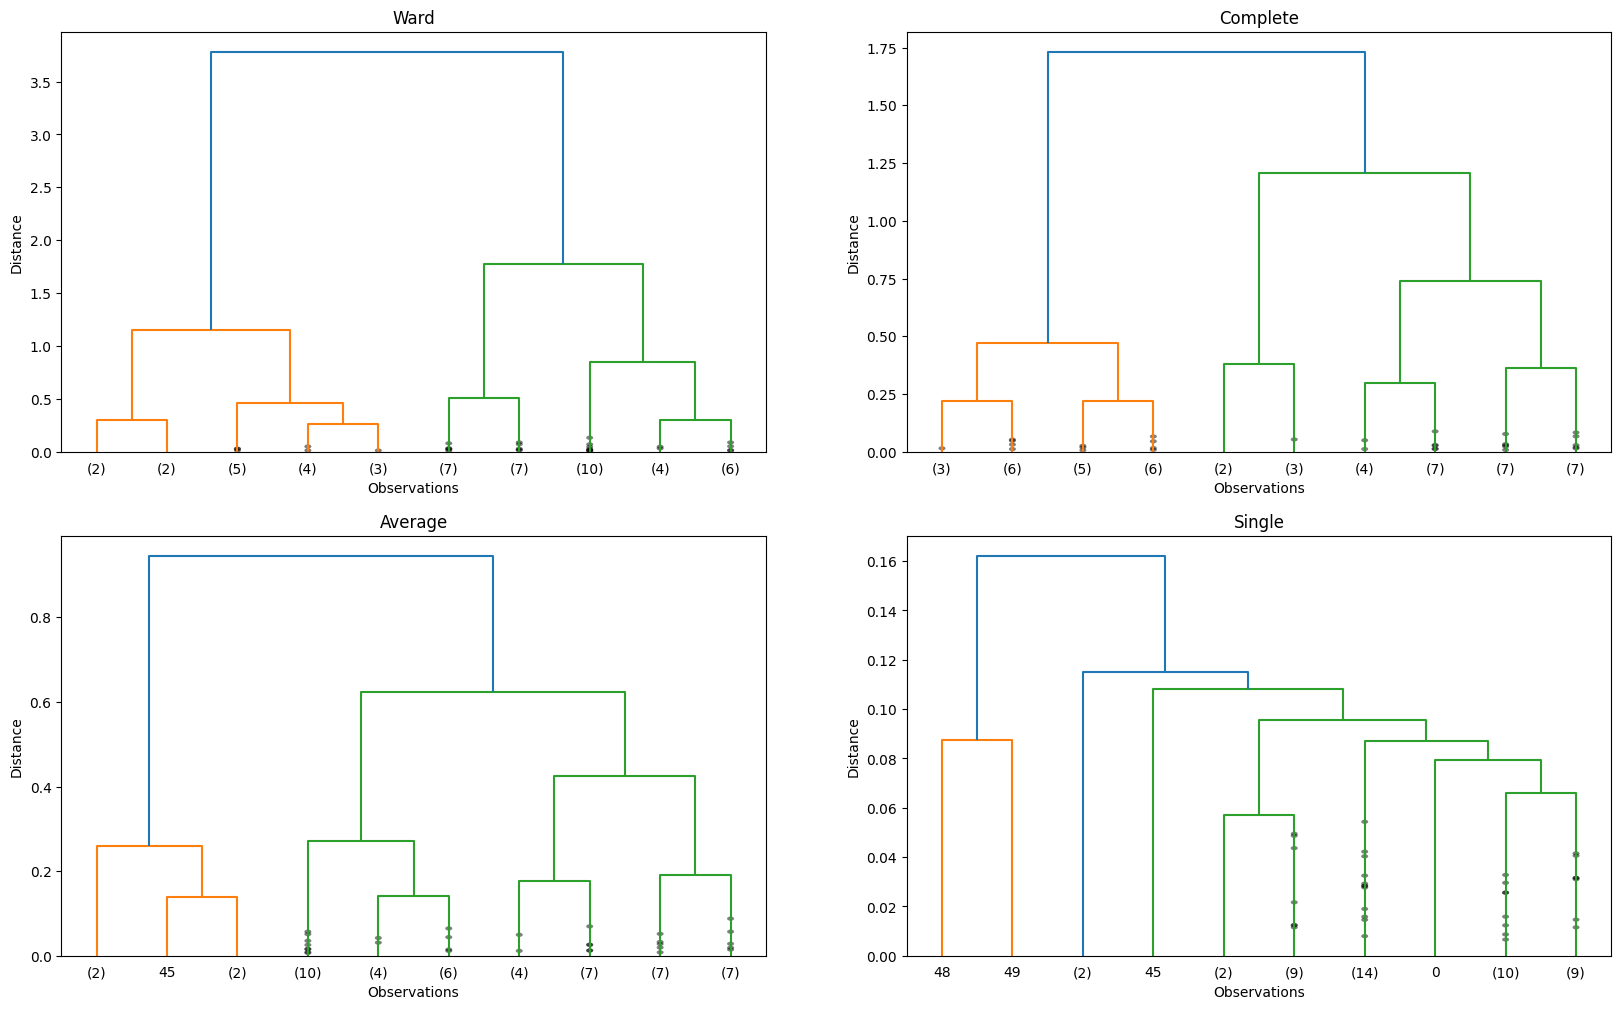

In [59]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [60]:
K = range(2,11)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.49680242574181405
Silhouette Score for 5 clusters: 0.4610301160129345
Silhouette Score for 6 clusters: 0.45309851046082883
Silhouette Score for 7 clusters: 0.39604153006494913
Silhouette Score for 8 clusters: 0.39684807539987044
Silhouette Score for 9 clusters: 0.3700971634671143
Silhouette Score for 10 clusters: 0.36251487312336017


In [61]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

In [65]:
X2.cluster.value_counts()

1    20
0    16
2    14
Name: cluster, dtype: int64

<AxesSubplot: xlabel='cluster', ylabel='Rape'>

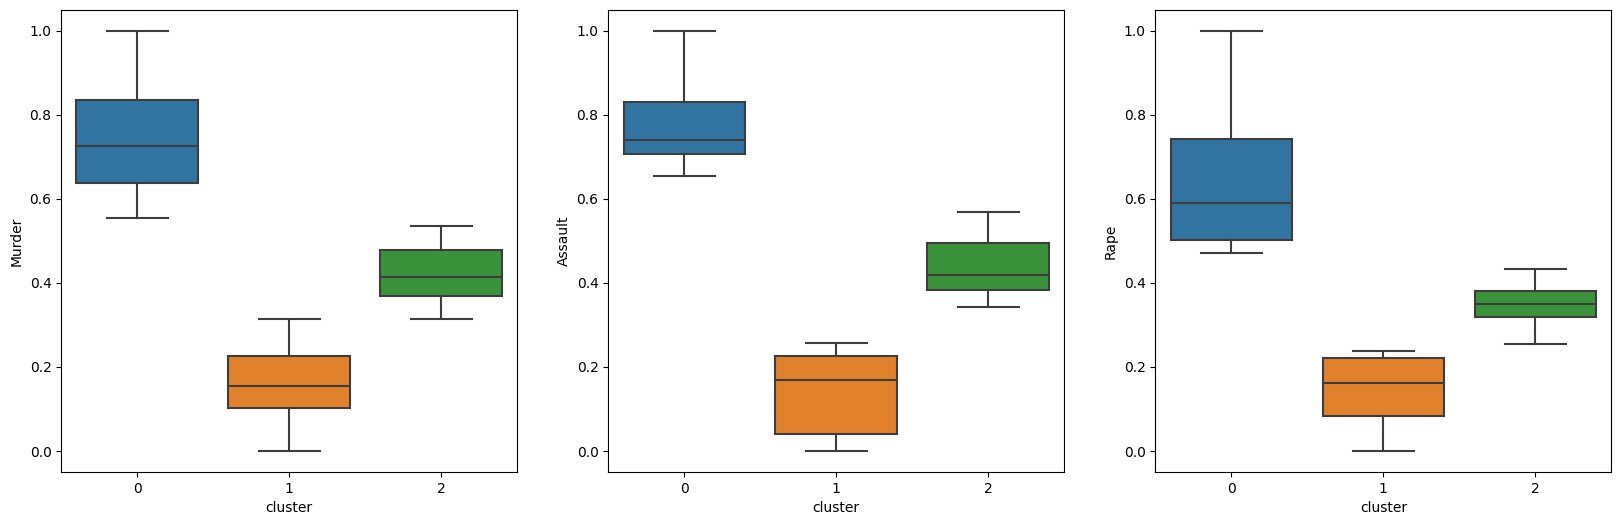

In [66]:
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.boxplot(y = "Murder", x = "cluster", data = X2)
plt.subplot(132)
sns.boxplot(y = "Assault", x = "cluster", data = X2)
plt.subplot(133)
sns.boxplot(y = "Rape", x = "cluster", data = X2)

In [67]:
X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.000000,0.000000,0.000000,1,low
1,0.078313,0.003425,0.012920,1,low
2,0.078313,0.010274,0.025840,1,low
3,0.084337,0.027397,0.051680,1,low
4,0.084337,0.037671,0.056848,1,low


In [68]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [70]:
X2["States"] = df.index
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,low,Alabama
1,0.078313,0.003425,0.012920,1,low,Alaska
2,0.078313,0.010274,0.025840,1,low,Arizona
3,0.084337,0.027397,0.051680,1,low,Arkansas
4,0.084337,0.037671,0.056848,1,low,California
5,0.108434,0.041096,0.090439,1,low,Colorado
6,0.108434,0.092466,0.098191,1,low,Connecticut
7,0.114458,0.123288,0.100775,1,low,Delaware
8,0.144578,0.130137,0.103359,1,low,Florida
9,0.150602,0.140411,0.142119,1,low,Georgia


In [71]:
X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})
X2.head()

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,low,Alabama
1,0.078313,0.003425,0.012920,1,low,Alaska
2,0.078313,0.010274,0.025840,1,low,Arizona
3,0.084337,0.027397,0.051680,1,low,Arkansas
4,0.084337,0.037671,0.056848,1,low,California


In [72]:
X2[X2.crime_level=="high"]["States"]

34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West Virginia
48         Wisconsin
49           Wyoming
Name: States, dtype: object

In [73]:
X2[X2.crime_level=="low"]["States"]

0         Alabama
1          Alaska
2         Arizona
3        Arkansas
4      California
5        Colorado
6     Connecticut
7        Delaware
8         Florida
9         Georgia
10         Hawaii
11          Idaho
12       Illinois
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
17      Louisiana
18          Maine
19       Maryland
Name: States, dtype: object